In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas_datareader as pdr

In [66]:
# Load and store data in dataframe from Yahoo Finance. Can enter any "ticker" 
df = pdr.get_data_yahoo('AAPL', start='2007-01-01', end='2011-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,3.092143,2.925000,3.081786,2.992857,1238319600,2.569716
2007-01-04,3.069643,2.993571,3.001786,3.059286,847260400,2.626754
2007-01-05,3.078571,3.014286,3.063214,3.037500,834741600,2.608047
2007-01-08,3.090357,3.045714,3.070000,3.052500,797106800,2.620926
2007-01-09,3.320714,3.041071,3.087500,3.306071,3349298400,2.838647
...,...,...,...,...,...,...
2010-12-27,11.622857,11.482857,11.530357,11.595714,249816000,9.956271
2010-12-28,11.666429,11.609286,11.639643,11.623929,175924000,9.980496
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200,9.974978


In [67]:
#Calculating the rolling averages of the adjusted closing price over 20 days and 50 days, and creating a dataframe
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()
df

,High,Low,Open,Close,Volume,Adj Close,MA20,MA50
Date,,,,,,,,
2007-01-03,3.092143,2.925000,3.081786,2.992857,1238319600,2.569716,NaN,NaN
2007-01-04,3.069643,2.993571,3.001786,3.059286,847260400,2.626754,NaN,NaN
2007-01-05,3.078571,3.014286,3.063214,3.037500,834741600,2.608047,NaN,NaN
2007-01-08,3.090357,3.045714,3.070000,3.052500,797106800,2.620926,NaN,NaN
2007-01-09,3.320714,3.041071,3.087500,3.306071,3349298400,2.838647,NaN,NaN
...,...,...,...,...,...,...,...,...
2010-12-27,11.622857,11.482857,11.530357,11.595714,249816000,9.956271,9.818478,9.640882
2010-12-28,11.666429,11.609286,11.639643,11.623929,175924000,9.980496,9.831664,9.647463
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200,9.974978,9.853344,9.651934


In [68]:
# There are NANs because each average needs the minimum number of Adjusted Close Prices in order to create an average. Dropped Nans.
df = df.dropna()

In [69]:
# Create an empty list for "buy" and "sell"
buy = []
sell = []

# Create function that sets the rules: 
## Buy when 20MA crosses above 50MA and was lower than the 50MA the day before.
## Sell then 20MA crosses below 50MA and was higher than the 50MA the day before.
for i in range(len(df)):       
    if df.MA20.iloc[i] > df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        sell.append(i)

In [70]:
# Print days/rows with "Buy" signals
buy

[1, 128, 186, 262, 367, 483, 507, 707, 752, 822, 886]

In [71]:
# Print days/rows with "Sell" signals
sell

[0, 112, 185, 216, 325, 378, 503, 698, 733, 817, 845]

In [72]:
#   if df.MA20.iloc[i] > df.MA50.iloc[i] \
#    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
#        Buy.append(i)
#    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
#    and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
#        Sell.append(i)

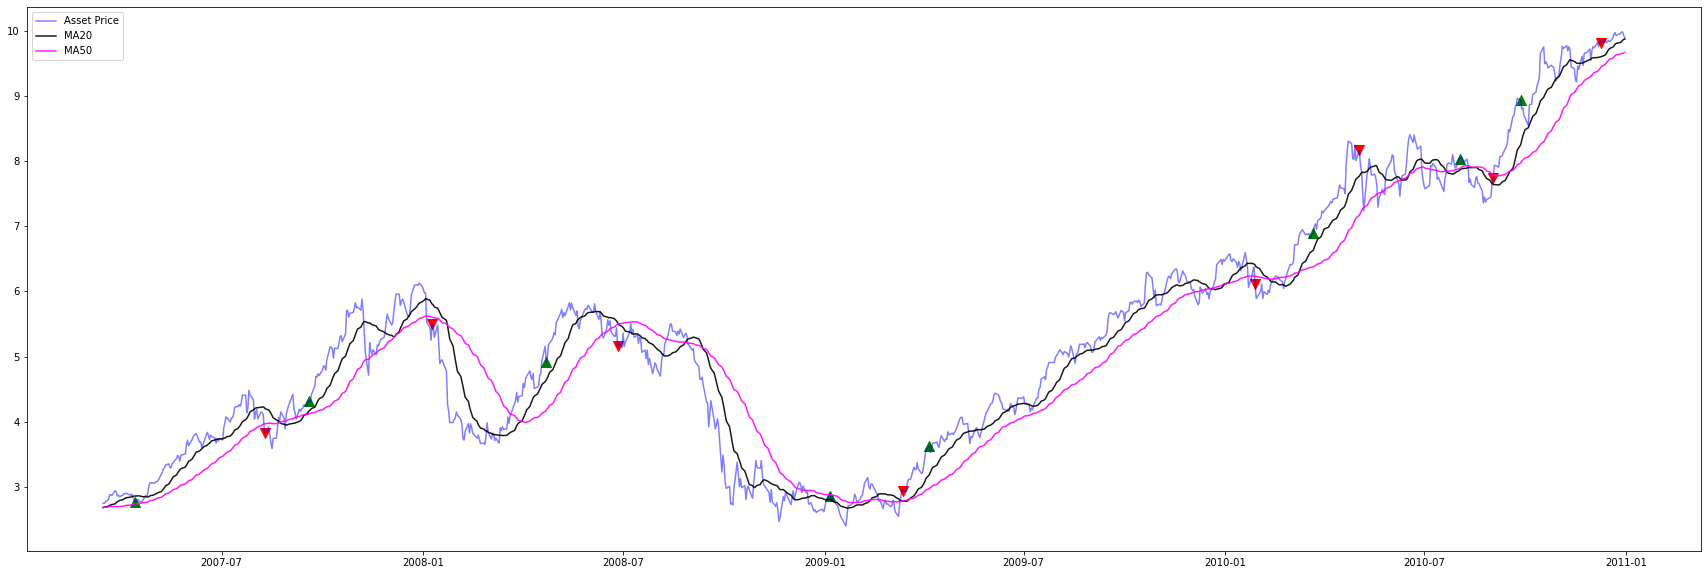

In [73]:
# Create Plot for buy and sell signals when the moving averages cross.

plt.figure(figsize=(30,10))
# Plot asset price in blue
plt.plot(df['Adj Close'], label= 'Asset Price', c='blue', alpha=0.5)
# Plot 20MA in black
plt.plot(df['MA20'], label='MA20', c='black', alpha=0.9)
# Plot 50MA in magenta
plt.plot(df['MA50'], label='MA50', c='magenta', alpha=0.9)
# Plot "Buy" signals with green up arrows
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'], marker='^', c='green', s=100)
# Plot "Sell" signals in red down arrows
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'], marker='v', c='red', s=100)
# Create Legend
plt.legend()
# Show plot
plt.show()


In [74]:
len(Sell)

8

In [75]:
len(Buy)

8

In [76]:
profit = (df.iloc[sell]['Adj Close'].values - df.iloc[buy]['Adj Close'].values) / df.iloc[buy]['Adj Close'].values

In [77]:
cum_return = (pd.Series(profit) + 1).cumprod().iloc[-1]
cum_return

0.8293339871383307

In [78]:
wins = [i for i in profit if i > 0]

In [79]:
probability = len(wins) / len(profit)
probability

0.09090909090909091

In [81]:
(df['Adj Close'].pct_change() + 1).cumprod().iloc[-1]

3.601204760501849